# (Mis)Classifying Gender in 20th Century Speculative Fiction using BookNLP 
This is where we will describe things, the code, BookNLP, and our project. We will also need to provide background.

In [207]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import analysis
import import_data

## Read in the data
Our initial data request was for 40 books, due to scanning limitations, rights issues, and BookNLP processing, we were only able to get access to 25 books. The data was provided via [HathiTrust Research Center](https://www.hathitrust.org/htrc). We limited our character analysis to those characters who have more than 50 mentions in a particular book. This is to limit the noise created by minor characters. For a fuller analysis of our corpus creation, please refer to import_data.py. From our 25 novels, we are left with about ~700 characters.

In [208]:
pickle_df = pd.read_pickle('booknlp.pkl')
pickle_df.head()

,title,year,language,authors,author_gender,trans,notes,id_y,g.inference.he/him/his,g.inference.she/her,g.inference.they/them/their,g.inference.xe/xem/xyr/xir,g.inference.ze/zem/zir/hir,g.argmax,g.max,mentions.proper,filename,count
0,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,gender-fluid gods,61,0.155,0.819,0.026,0.000,0.000,she/her,0.819,"[{'c': 714, 'n': 'Anyanwu'}, {'c': 28, 'n': 'W...",mdp.39015054037372,4324
1,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,gender-fluid gods,60,0.706,0.229,0.043,0.008,0.014,he/him/his,0.706,"[{'c': 956, 'n': 'Doro'}, {'c': 49, 'n': 'Wild...",mdp.39015054037372,3694
2,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,gender-fluid gods,0,0.491,0.415,0.068,0.010,0.016,he/him/his,0.491,[],mdp.39015054037372,2512
3,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,gender-fluid gods,84,0.650,0.216,0.085,0.019,0.030,he/him/his,0.650,"[{'c': 391, 'n': 'Isaac'}, {'c': 8, 'n': 'Wild...",mdp.39015054037372,961
4,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,gender-fluid gods,2648,0.000,0.000,1.000,0.000,0.000,they/them/their,1.000,[],mdp.39015054037372,210


## Preprocess the data we have read in
Get main characters per book, note if they have more than one gender associated with them, merge entity and book tables

In [209]:
entities_df = import_data.read_char('data')  # currently not actually effective

In [210]:
entities_df.head()

,COREF,prop,cat,text
0,1,PROP,FAC,Wild Seed by Octavia E. Butler WILD SEED KINDR...
1,2,PROP,FAC,Octavia E. Butler WILD SEED
2,0,PRON,PER,MY
3,3,PROP,FAC,Wild Seed OCTAVIA E. BUTLER DOUBLEDAY & COMPANY
4,174,NOM,GPE,GARDEN CITY


In [211]:
lhd_entit = pd.read_csv('data/dan_booknlp/mdp.39015052467530/mdp.39015052467530.entities', sep='\t')
lhd_entit.drop(['start_token', 'end_token'], axis=1, inplace=True)  # drop because it complicates what counts as a unique row

In [212]:
lhd_entit.head()

,COREF,prop,cat,text
0,584,NOM,FAC,NIVERS THE UN CHIGAN • LIBRE BRARIES THE LEFT ...
1,1,PROP,FAC,URSULA K. LEGUIN WALKER AND COMPANY New York UGL
2,374,PROP,PER,Ursula
3,2,PROP,GPE,LeGuin
4,585,NOM,PER,the Publisher


In [213]:
lhd_chars = lhd_entit.merge(pickle_df, left_on='COREF', right_on='id_y', how='inner')
lhd_chars.head()

,COREF,prop,cat,text,title,year,language,authors,author_gender,trans,...,g.inference.he/him/his,g.inference.she/her,g.inference.they/them/their,g.inference.xe/xem/xyr/xir,g.inference.ze/zem/zir/hir,g.argmax,g.max,mentions.proper,filename,count
0,586,NOM,GPE,the United States of America,Woman on the edge of time / Marge Piercy.,1976.0,eng,"Piercy, Marge",she/her,no,...,0.012,0.731,0.239,0.009,0.009,she/her,0.731,"[{'c': 24, 'n': 'Parra'}]",mdp.39015000244577,96
1,586,NOM,GPE,the United States of America,Woman on the edge of time / Marge Piercy.,1976.0,eng,"Piercy, Marge",she/her,no,...,0.012,0.731,0.239,0.009,0.009,she/her,0.731,"[{'c': 24, 'n': 'Parra'}]",mdp.39015000244577,96
2,589,NOM,FAC,The Place Inside the Blizzard,Children of God : a novel / Mary Doria Russell.,1998.0,eng,"Russell, Mary Doria 1950-",she/her,no,...,0.095,0.504,0.357,0.021,0.022,she/her,0.504,"[{'c': 25, 'n': 'Danny'}, {'c': 8, 'n': 'Dani'...",mdp.39015047519965,52
3,589,NOM,FAC,The Place Inside the Blizzard,Memoirs of a spacewoman / Naomi Mitchison.,1985.0,eng,"Mitchison, Naomi 1897-1999",she/her,no,...,0.000,0.000,1.000,0.000,0.000,they/them/their,1.000,[],uc1.32106008566652,58
4,589,NOM,FAC,The Place Inside the Blizzard,Children of God : a novel / Mary Doria Russell.,1998.0,eng,"Russell, Mary Doria 1950-",she/her,no,...,0.095,0.504,0.357,0.021,0.022,she/her,0.504,"[{'c': 25, 'n': 'Danny'}, {'c': 8, 'n': 'Dani'...",mdp.39015047519965,52


In [214]:
lhd_unique = lhd_chars.groupby('COREF')[['text', 'g.argmax', 'g.max']].agg({'text':'unique', 'g.argmax':'first', 'g.max':'first'})
lhd_unique.head()

,text,g.argmax,g.max
COREF,,,
0,"[my, I, me, myself, i, you, your, You, My, you...",he/him/his,0.491
33,"[the Sinoth Valley, Sinoth Valley, the dispute...",he/him/his,0.734
35,"[the high North Fall, the North Fall]",he/him/his,0.758
37,[Or . goreyn],he/him/his,0.654
43,[Cars],they/them/their,0.981


## Plots of metadata about the books + authors themselves
This will plot things like how many books were written by women, in what years, blah blah blah

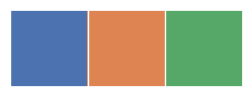

In [215]:
sns.set_theme(style='darkgrid')
sns.palplot(sns.color_palette("deep", 3))

[Text(0.5, 1.0, 'Total Characters by Year')]

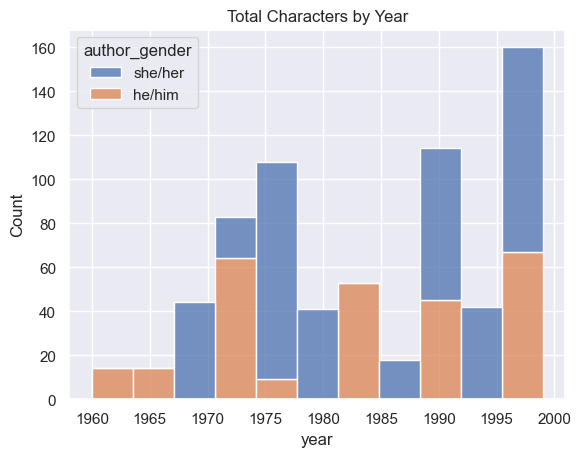

In [216]:
sns.histplot(pickle_df, x="year", hue="author_gender", multiple="stack", stat="count").set(title='Total Characters by Year')

# note one book written by a trans author (identifies as she/her -- written in 1993)

## Plot Gender Inferences for Main Characters
plots of gender proportions across all books and gender counts. also a plot of author gender vs character gender (maybe)

In [217]:
#create dataframes that segment by author gender
women_auth_df = pickle_df[pickle_df['author_gender'] == 'she/her']
men_auth_df = pickle_df[pickle_df['author_gender'] == 'he/him']
trans_auth_df = pickle_df[pickle_df['trans'] == 'yes']

#notes: these colors need to be consistent throughout. also need to add titles and explanations

[Text(0.5, 1.0, 'Character Gender Breakdown for Female Authors')]

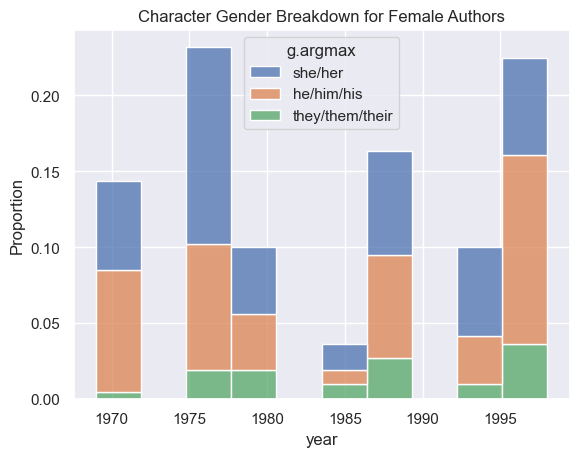

In [218]:
# characters by women authors

sns.histplot(women_auth_df, x="year", hue="g.argmax", multiple="stack", stat="proportion").set(title='Character Gender Breakdown for Female Authors')

[Text(0.5, 1.0, 'Character Gender Breakdown for Male Authors')]

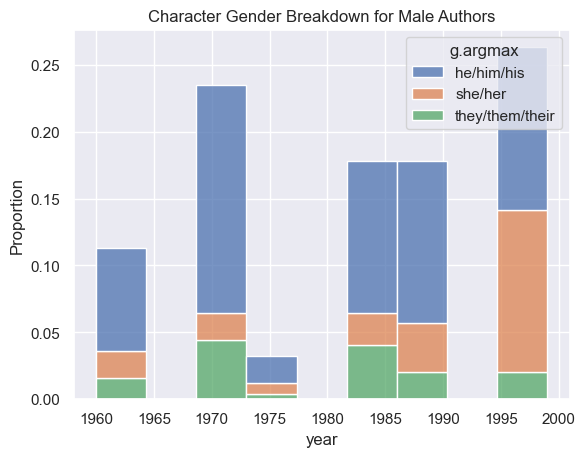

In [219]:
# characters by men authors

sns.histplot(men_auth_df, x="year", hue="g.argmax", multiple="stack", stat="proportion").set(title='Character Gender Breakdown for Male Authors')

[Text(0.5, 1.0, 'Character Gender Breakdown for Trans Authors')]

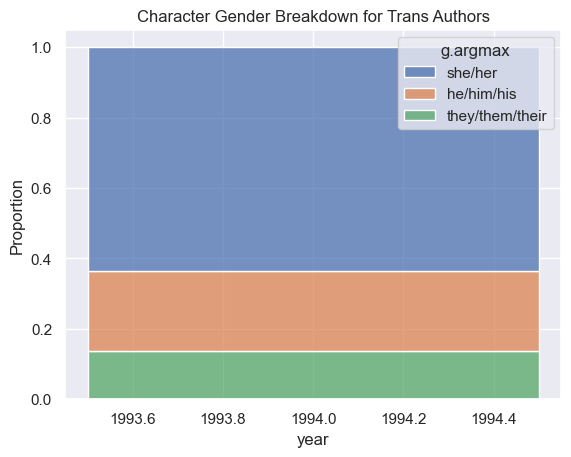

In [220]:
# characters by trans authors

sns.histplot(trans_auth_df, x="year", hue="g.argmax", multiple="stack", stat="proportion").set(title='Character Gender Breakdown for Trans Authors')

As part of our analysis, we created a dataset that recorded the gender of forty-two characters across twenty novels. While we tried to focus on non-binary or gender-fluid characters, we also included in our dataset the main characters of the novels. We do this to begin to test the accuracy of BookNLP's gender inference probability.

In [221]:
hc_df = pd.read_csv('data/HT_speculative_fiction_handcoded.csv')
hc_df.head()

,character,character_gender,description,book_id,title,year,language,authors,notes
0,Charlie Johns,he/him,man,mdp.39015014854346,Venus plus X / Theodore Sturgeon.,1960,eng,"Sturgeon, Theodore",future utopia one neutered gender
1,Seace,he/him,gender-neutral,mdp.39015014854346,Venus plus X / Theodore Sturgeon.,1960,eng,"Sturgeon, Theodore",future utopia one neutered gender
2,Philos,he/him,gender-neutral,mdp.39015014854346,Venus plus X / Theodore Sturgeon.,1960,eng,"Sturgeon, Theodore",future utopia one neutered gender
3,Marian MacAlpin,she/her,woman,mdp.39015004274349,The edible woman [by] Margaret Atwood.,1969,eng,"Atwood, Margaret 1939-",themes of sexual identity loss and alienation
4,Peter Wollander,he/him,man,mdp.39015004274349,The edible woman [by] Margaret Atwood.,1969,eng,"Atwood, Margaret 1939-",themes of sexual identity loss and alienation


In [222]:
pickle_df.rename(columns = {'mentions.proper':'mentions_proper'}, inplace = True)

In [223]:
def get_name(mentions_proper):
    try:
        return mentions_proper[0]['n']
    except IndexError:
        return None

pickle_df['name'] = pickle_df.mentions_proper.apply(get_name)

In [224]:
characters_str = '|'.join(hc_df['character'].tolist())

In [225]:
mask = pickle_df['name'].str.contains(characters_str)
mask = mask.fillna(False)
prop_df_inter = pickle_df[mask]
prop_df = hc_df.merge(prop_df_inter, left_on='character', right_on='name', how='left')

In [226]:
prop_df = prop_df[['character', 'description', 'character_gender', 'title_x', 'year_x', 'name', 'g.max', 'g.argmax']]

The results of our hand-encoded data are inconclusive. According to our analysis, BookNLP is over 95% accurate in calculating gender based on pronouns. However, our data do not produce enough results to draw signifcant conclusions. We only encoded the genders of 42 characters, and could not locate 16 of them. Resultantly, we only had 26 data points to work with. Please see those in the data below.

In [236]:
prop_df.head()

,character,description,character_gender,title_x,year_x,name,g.max,g.argmax
0,Charlie Johns,man,he/him,Venus plus X / Theodore Sturgeon.,1960,NaN,NaN,NaN
1,Seace,gender-neutral,he/him,Venus plus X / Theodore Sturgeon.,1960,Seace,0.647,he/him/his
2,Philos,gender-neutral,he/him,Venus plus X / Theodore Sturgeon.,1960,Philos,0.724,he/him/his
3,Marian MacAlpin,woman,she/her,The edible woman [by] Margaret Atwood.,1969,NaN,NaN,NaN
4,Peter Wollander,man,he/him,The edible woman [by] Margaret Atwood.,1969,NaN,NaN,NaN


## Case studies

### Left Hand of Darkness
The next few cells are focused on one book: _The Left Hand of Darkness_ by Ursula K. LeGuin. This is a famous example of a book with characters who can change sex as an adult. In this book, however, she refers to the main character with male pronouns. We want to step through a bit of basic verification to see what this looks like. The three characters we are pulling are Genly, an exclusively male character, Estraven, an alien who can change sex but uses male pronouns in the book, and King Argaven, a "male" alien who carries a pregnancy.

In [228]:
lhd_df = pickle_df[pickle_df['title']=='The left hand of darkness / by Ursula K. LeGuin.']
lhd_chars_list = ['Estraven', 'Argaven','Genly Ai']
lhd_chars = analysis.get_character_refs(lhd_chars_list, lhd_entit)

In [229]:
lhd_final = analysis.combine_book_and_entity(lhd_chars, lhd_df)
lhd_final

,text,g.argmax,g.max
COREF,,,
376,"[Genly Ai, Genly, Poor Genly, he, Ai, his, him...",he/him/his,0.973
377,"[King Argaven XV , in white tunic and shirt an...",he/him/his,0.856
384,"[Mr. Ai, you, yours, your, You, Envoy, I, my, ...",he/him/his,0.811
385,"[Estraven the Traitor, Lord Estraven, his, Est...",he/him/his,0.805
397,"[Gethen, Karhide, Argaven, he, him, his, King ...",he/him/his,0.856


We can see in the final entity table that these three characters have 5 references associated with them. Only Estraven is correctly identified as being one character across his different suffixes and prefixes. The characters are "correctly" associated as he/him, since that is how the text refers to them. But it is perhaps interesting to note that Genly, the human-esque male character, has the highest confidence in the list with his COREF number 376. 

### Woman on the Edge of Time
Some of the characters in this story are notably genderless, with the author using per/person as pronouns. These neo-pronouns are not in the list that BookNLP generates. Therefore we want to know, how are these characters showing up?

In [230]:
### to be fixed later
wet_entit = pd.read_csv('data/dan_booknlp/mdp.39015000244577/mdp.39015000244577.entities', sep='\t')
wet_entit.drop(['start_token', 'end_token'], axis=1, inplace=True)  # drop because it complicates what counts as a unique row

In [231]:
wet_df = pickle_df[pickle_df['title']=='Woman on the edge of time / Marge Piercy.']
wet_chars_list = ['Luciente', 'Jackrabbit', 'Connie']
wet_chars = analysis.get_character_refs(wet_chars_list, wet_entit)

In [232]:
wet_final = analysis.combine_book_and_entity(wet_chars, wet_df)
wet_final

,text,g.argmax,g.max
COREF,,,
309,"[Luciente, Me, I, Her, you, my, me, My, You, y...",she/her,0.869
377,"[Jackrabbit, this Jackrabbit, He, he, his, I, ...",he/him/his,0.521
554,"[Connie, her, Awkwardly Connie, she, She, you,...",she/her,0.772


Here, each character is successfully identified with one reference. Jackrabbit, however, is a genderless character using per/person. This person has been misidentified as "he/him/his," although with low confidence. Interestingly, the text includes explicit references to "he" and "his." Luciente is described as androgynous but female, and as such is gendered correctly. Connie is a woman from our time and is also correctly gendered.

### Wild Seed
The main characters of this book are two god-like beings who can inhabit any body (and thus be any gender). There is a feminine character Anyanwu, and a masculine character Doro. Anyanwu is a shapeshifter, while Doro can take over other people's bodies. Their names *should* be consistent throughout the story but pronouns may not be.

In [233]:
ws_entit = pd.read_csv('data/dan_booknlp/mdp.39015054037372/mdp.39015054037372.entities', sep='\t')
ws_entit.drop(['start_token', 'end_token'], axis=1, inplace=True)  # drop because it complicates what counts as a unique row

In [234]:
ws_df = pickle_df[pickle_df['title']=='Wild seed / Octavia E. Butler.']
ws_chars_list = ['Doro', 'Anyanwu']
ws_chars = analysis.get_character_refs(ws_chars_list, ws_entit)

In [235]:
ws_final = analysis.combine_book_and_entity(ws_chars, ws_df)
ws_final

,text,g.argmax,g.max
COREF,,,
60,"[Doro, he, his, him, He, your, Wild Seed, you,...",he/him/his,0.706
61,"[Anyanwu, She, her, she, herself, Her, Seed, m...",she/her,0.819


Both of these characters appear to be gendered correctly and identified correctly. It may be difficult to parse out, however, other places in the book where these characters may be referred to by other names.